In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuron

In [4]:
def calc_hh():
    soma = neuron.h.Section(name="soma")

    soma.nseg = 1
    soma.diam = 10   # [um]
    soma.L = 10      # [um]

    soma.insert("hh")
    meca = soma(0.5).hh

    stim = neuron.h.IClamp(soma(0.5))
    stim.delay = 50  # [ms]
    stim.dur = 200   # [ms]
    stim.amp = 0.1   # [nA]

    # set record
    rec_t = neuron.h.Vector()
    rec_t.record(neuron.h._ref_t)
    rec_v = neuron.h.Vector()
    rec_v.record(soma(0.5)._ref_v)

    neuron.h.finitialize(-65)
    tstop = 300
    neuron.run(tstop)

    # convert neuron array to numpy array
    t = rec_t.as_numpy()
    v = rec_v.as_numpy()

    return np.array(t), np.array(v)

def plot_voltage(t, v):
    plt.plot(t, v, color='b')
    plt.xlabel("Time [ms]")
    plt.ylabel("Voltage [mV]")
    plt.axis(xmin=0, xmax=max(t), ymin=min(v)-5, ymax=max(v)+5)
    plt.show()

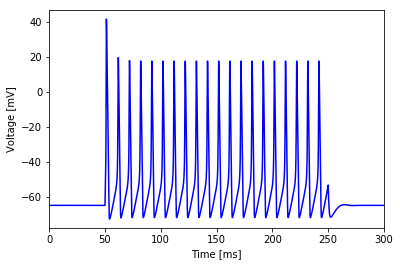

In [5]:
t, v = calc_hh()
plot_voltage(t, v)